Часть 1. EDA

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [146]:
df = pd.read_csv ('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [147]:
df.shape

(569, 33)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [149]:
#Как видно, строка "Unnamed: 32" имеет все пустые значения, смысла оставлять данный столбец нет. 
#Также как и столбец id, с номером пациента от которой никак не может зависеть целевая переменная.
df = df.drop(["Unnamed: 32", "id" ], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [150]:
pd.set_option('display.max_columns', None)
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [151]:
#Это целевая переменная, имеет 2 значения. B и M (benign - доброкачественная, malignant - злокачественная).
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [152]:
#Преобразуем в бинарные значения для возможности построения матрицы корелляций
binary_diagnosis = {"diagnosis":     {"B": 0, "M": 1}}
df = df.replace(binary_diagnosis)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

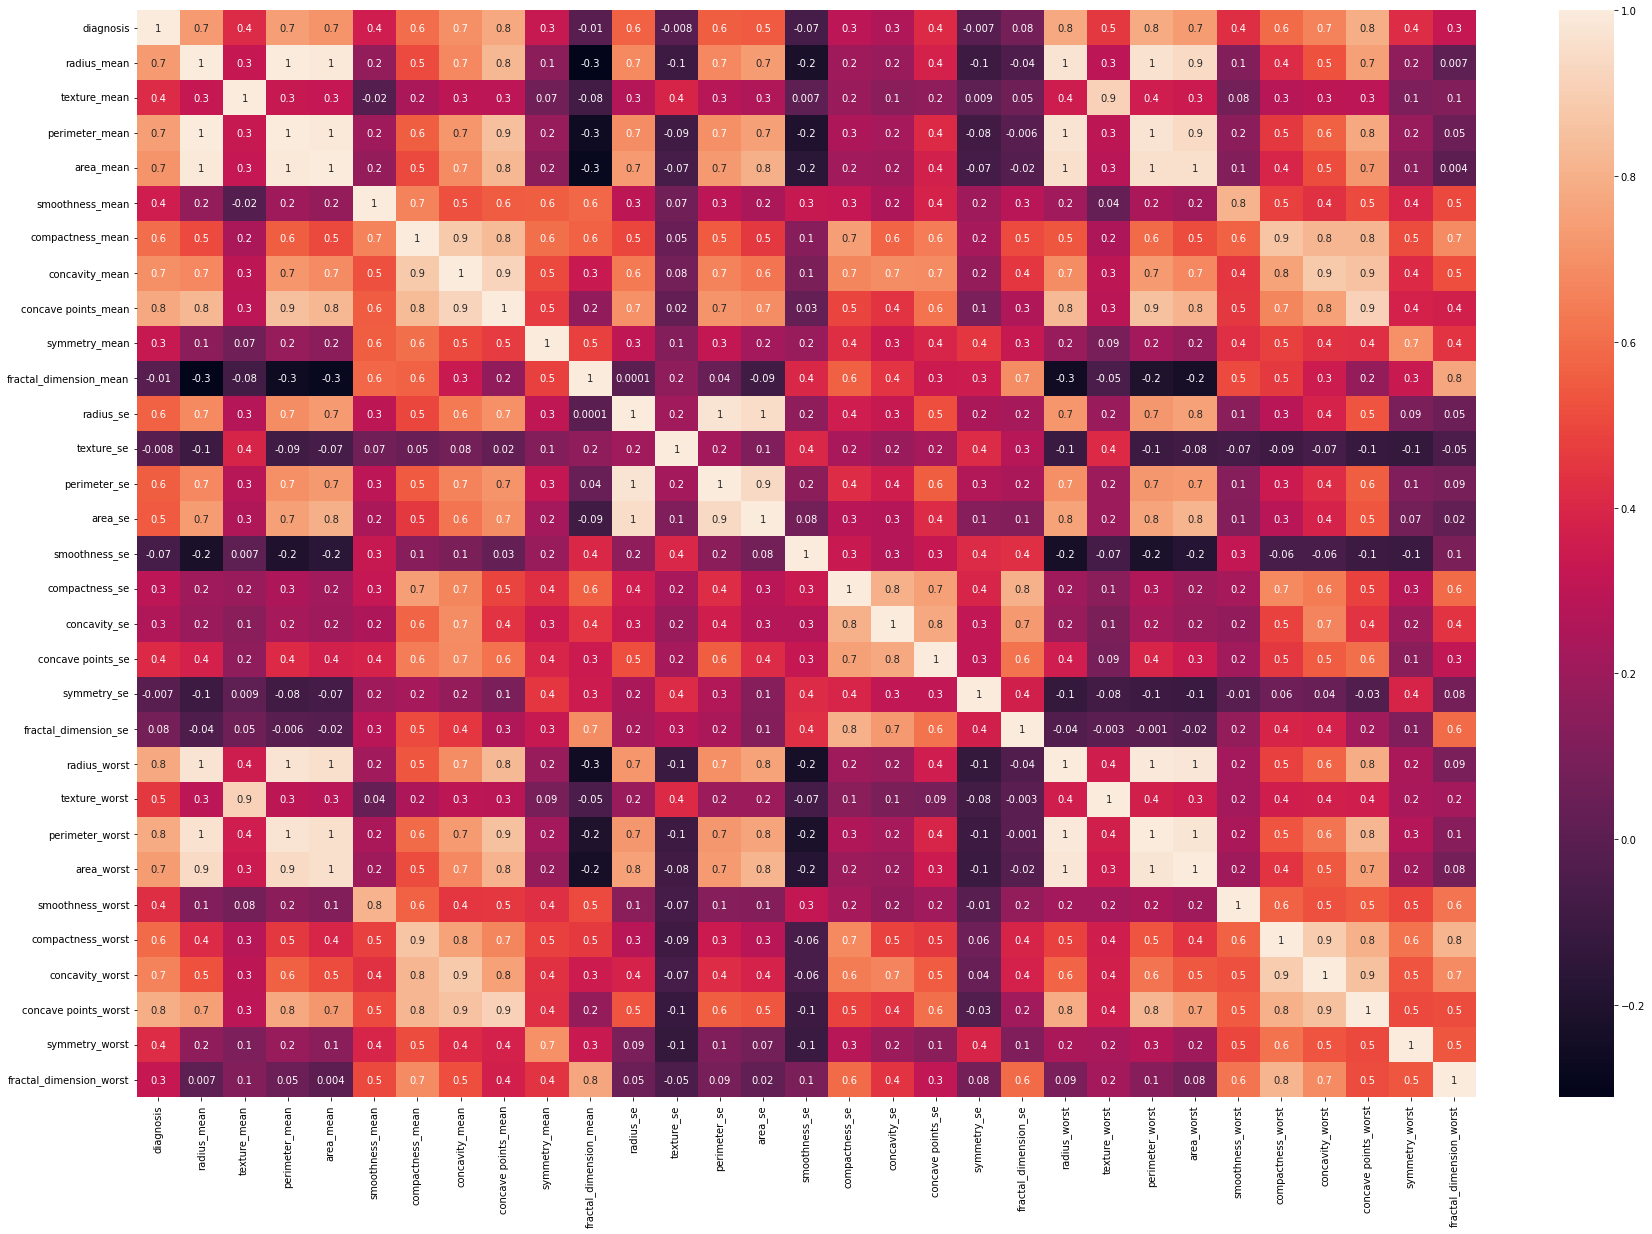

In [153]:
#Построение матрицы корелляций
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(df.corr(),annot = True, fmt='.1g')

In [154]:
#Данные кажутся перепутанными. Для лучшей наглядности поменяю местами столбцы.
df = df.reindex(columns=['diagnosis','radius_mean','radius_se','radius_worst','perimeter_mean','perimeter_se',
                         'perimeter_worst','area_mean','area_se','area_worst','texture_mean', 'texture_se',
                         'texture_worst','smoothness_mean','smoothness_se','smoothness_worst','compactness_mean',
                         'compactness_se', 'compactness_worst','concavity_mean','concavity_se','concavity_worst',
                         'concave points_mean','concave points_se','concave points_worst', 'symmetry_mean',
                         'symmetry_se', 'symmetry_worst','fractal_dimension_mean', 'fractal_dimension_se',
                         'fractal_dimension_worst'])
df.head()

,diagnosis,radius_mean,radius_se,radius_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,area_se,area_worst,texture_mean,texture_se,texture_worst,smoothness_mean,smoothness_se,smoothness_worst,compactness_mean,compactness_se,compactness_worst,concavity_mean,concavity_se,concavity_worst,concave points_mean,concave points_se,concave points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,1,17.99,1.0950,25.38,122.80,8.589,184.60,1001.0,153.40,2019.0,10.38,0.9053,17.33,0.11840,0.006399,0.1622,0.27760,0.04904,0.6656,0.3001,0.05373,0.7119,0.14710,0.01587,0.2654,0.2419,0.03003,0.4601,0.07871,0.006193,0.11890
1,1,20.57,0.5435,24.99,132.90,3.398,158.80,1326.0,74.08,1956.0,17.77,0.7339,23.41,0.08474,0.005225,0.1238,0.07864,0.01308,0.1866,0.0869,0.01860,0.2416,0.07017,0.01340,0.1860,0.1812,0.01389,0.2750,0.05667,0.003532,0.08902
2,1,19.69,0.7456,23.57,130.00,4.585,152.50,1203.0,94.03,1709.0,21.25,0.7869,25.53,0.10960,0.006150,0.1444,0.15990,0.04006,0.4245,0.1974,0.03832,0.4504,0.12790,0.02058,0.2430,0.2069,0.02250,0.3613,0.05999,0.004571,0.08758
3,1,11.42,0.4956,14.91,77.58,3.445,98.87,386.1,27.23,567.7,20.38,1.1560,26.50,0.14250,0.009110,0.2098,0.28390,0.07458,0.8663,0.2414,0.05661,0.6869,0.10520,0.01867,0.2575,0.2597,0.05963,0.6638,0.09744,0.009208,0.17300
4,1,20.29,0.7572,22.54,135.10,5.438,152.20,1297.0,94.44,1575.0,14.34,0.7813,16.67,0.10030,0.011490,0.1374,0.13280,0.02461,0.2050,0.1980,0.05688,0.4000,0.10430,0.01885,0.1625,0.1809,0.01756,0.2364,0.05883,0.005115,0.07678


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   radius_se                569 non-null    float64
 3   radius_worst             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   perimeter_se             569 non-null    float64
 6   perimeter_worst          569 non-null    float64
 7   area_mean                569 non-null    float64
 8   area_se                  569 non-null    float64
 9   area_worst               569 non-null    float64
 10  texture_mean             569 non-null    float64
 11  texture_se               569 non-null    float64
 12  texture_worst            569 non-null    float64
 13  smoothness_mean          569 non-null    float64
 14  smoothness_se            5

<AxesSubplot:>

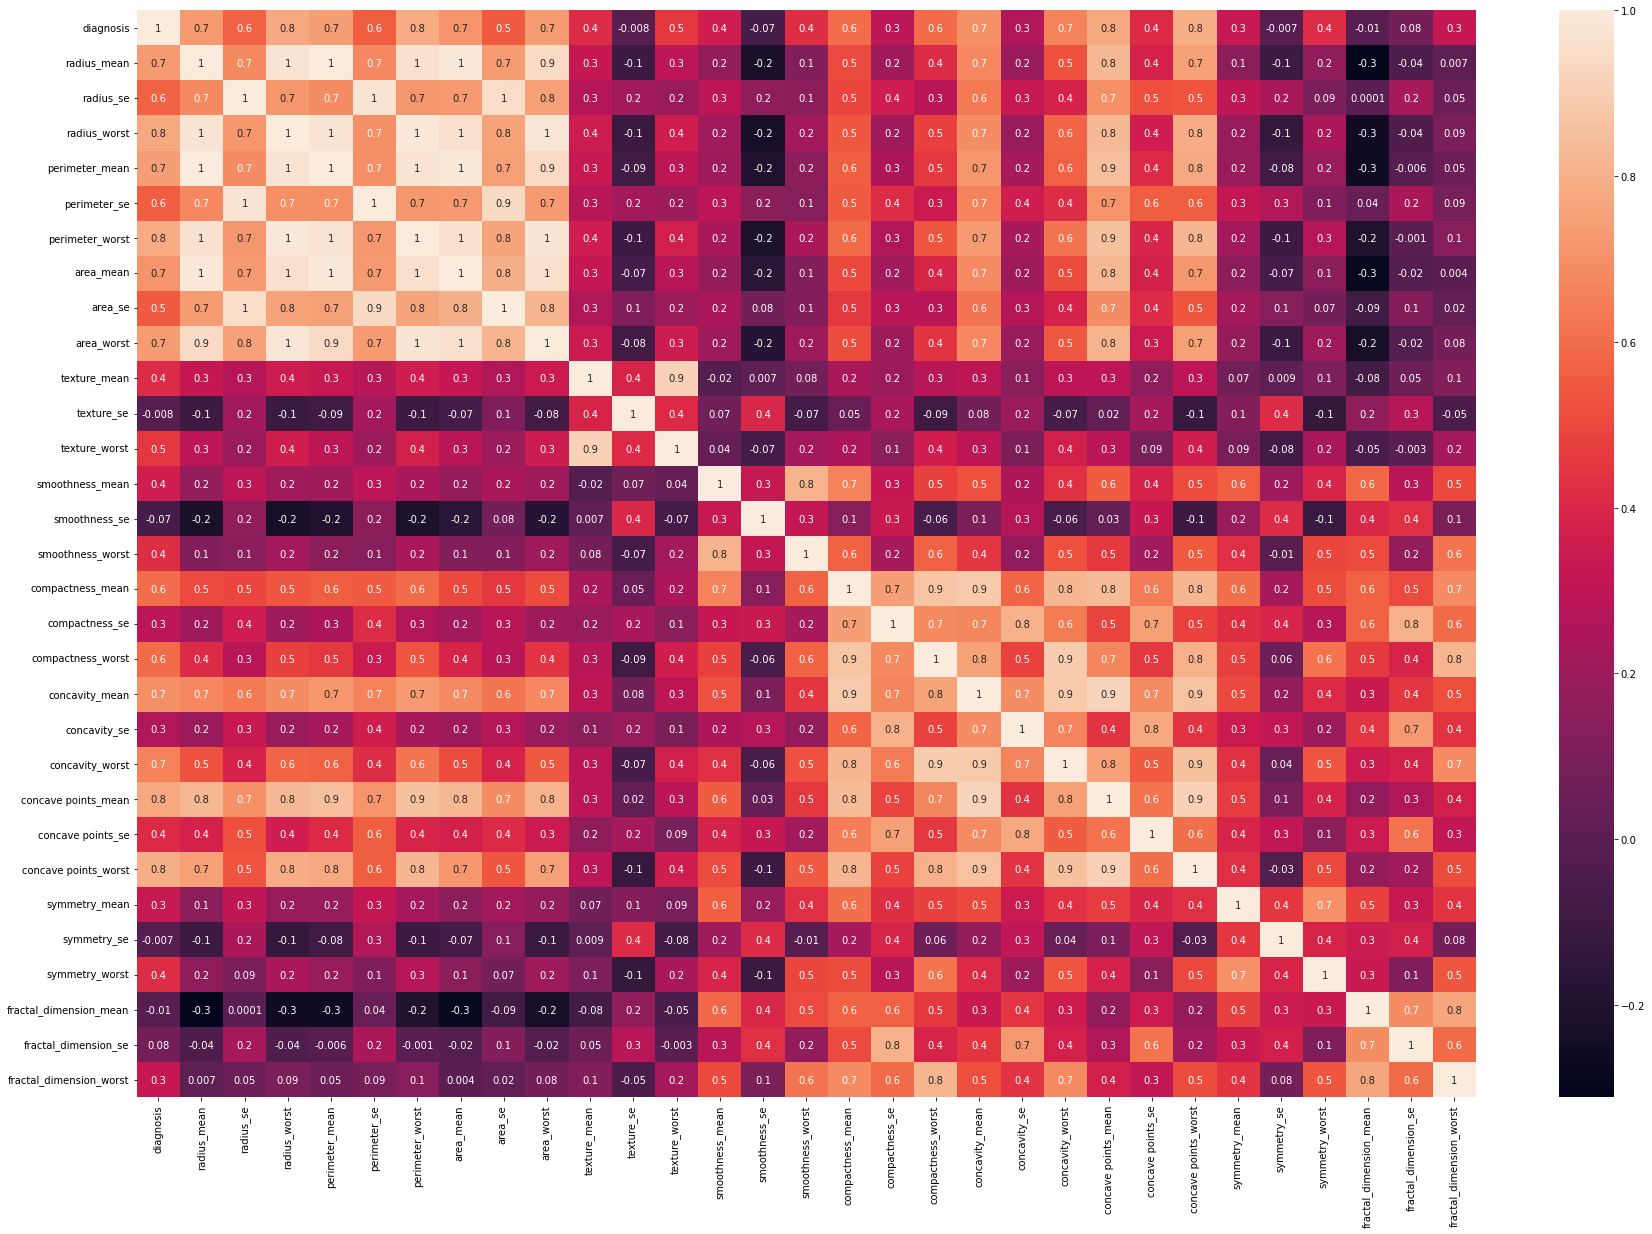

In [156]:
#Стало получше. Посмотрим на матрицу корреляций.
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(df.corr(),annot = True, fmt='.1g')

In [157]:
#Сильной корреляцией считается корреляция с коэффициентом 0,7 и выше (больше 0,9 очень сильной). 
#Если оценивать корреляцию целевого признака (diagnosis) от остальных, то сильно скоррелированы:
#средние (mean) и наихудшие (worst) размерные параметры, такие как
#radius_mean
#radius_worst
#perimeter_mean
#perimeter_worst
#area_mean
#area_worst
#А также вогнутость и количество точек вогнутости, что бы это не значило:
#concavity_mean
#concavity_worst
#concave points_mean
#concave points_worst

#Если говорить о корреляции числовых признаков между собой, то:
#1) Полная или почти полная корелляция наблюдается между размерными признаками опухоли 
#(н-р диаметром и периметром, что логично) - верхний левый квадрат.
#2) также сильная корреляция наблюдается между другими нестандартными "описательными" признаками, такими как: 
#compactness_mean, compactness_se, compactness_worst, concavity_mean, concavity_se, concavity_worst, concave points_mean,
#concave points_se, concave points_worst - квадрат чуть ниже центра по диагонали.

#Для построения попарных scatterplot'ов имеет смысл рассмотреть зависимости "описательных" признаков от размерных:
#3) средняя вогнутость (concavity_mean) сильно кореллирует от всех размерных признаков. 
#В данном случае буду рассматривать среднее значение от средних.
#4) Также среднее количество точек вогнутости (concave points_mean) сильно коррелирует с размерными параметрами, 
#также возьму средние значения от средних.


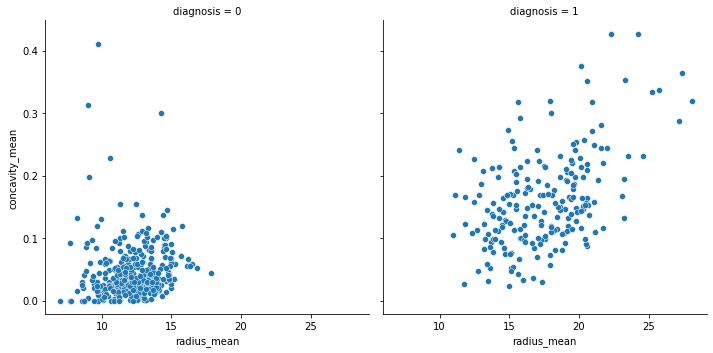

In [158]:
sns.relplot(
    x='radius_mean', 
    y='concavity_mean', 
    data=df, 
    kind='scatter', 
    col='diagnosis');

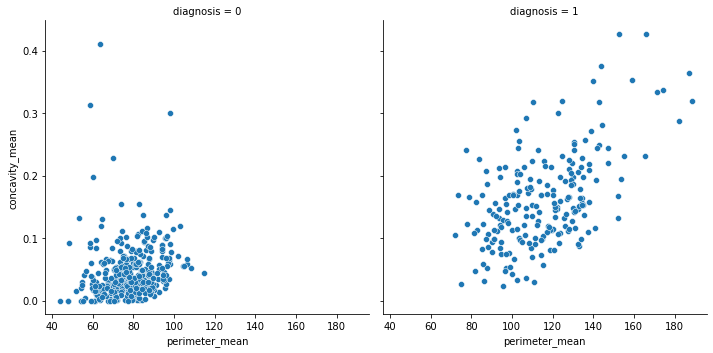

In [159]:
sns.relplot(
    x='perimeter_mean', 
    y='concavity_mean', 
    data=df, 
    kind='scatter', 
    col='diagnosis');

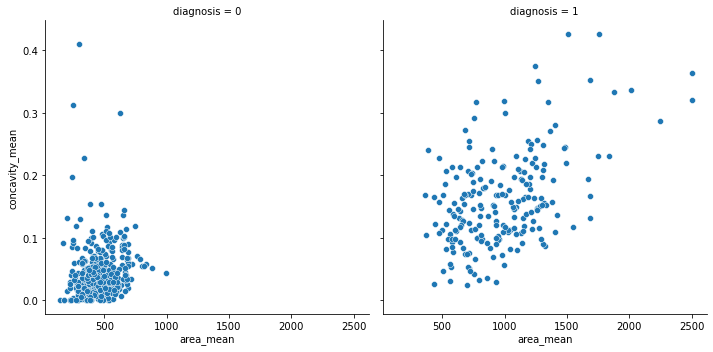

In [160]:
sns.relplot(
    x='area_mean', 
    y='concavity_mean', 
    data=df, 
    kind='scatter', 
    col='diagnosis');

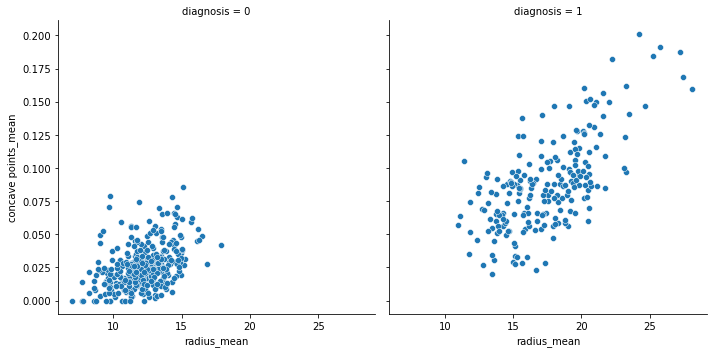

In [161]:
sns.relplot(
    x='radius_mean', 
    y='concave points_mean', 
    data=df, 
    kind='scatter', 
    col='diagnosis');

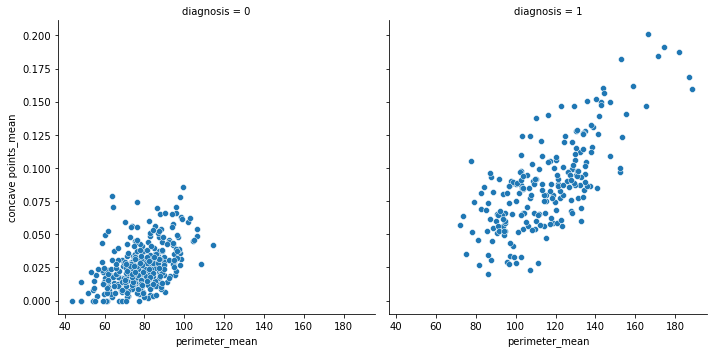

In [162]:
sns.relplot(
    x='perimeter_mean', 
    y='concave points_mean', 
    data=df, 
    kind='scatter', 
    col='diagnosis');

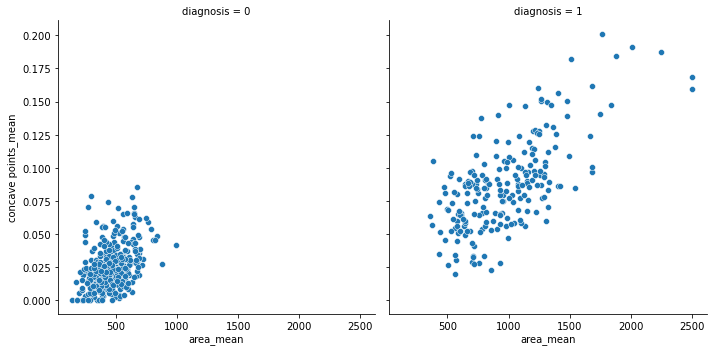

In [163]:
sns.relplot(
    x='area_mean', 
    y='concave points_mean', 
    data=df, 
    kind='scatter', 
    col='diagnosis');

In [164]:
#Как видно из scatterplot'ов при злокачественных опухолях наблюдается линейная зависимость 
#concavity_mean и concave points_mean от размерных признаков.

In [165]:
#Далее boxplot'ы с группировкой по целевой переменной.

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

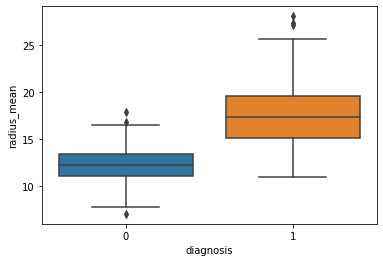

In [166]:
sns.boxplot(data=df, x="diagnosis", y="radius_mean")

<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_mean'>

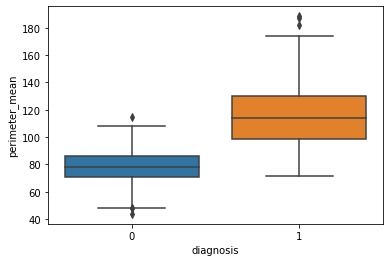

In [167]:
sns.boxplot(data=df, x="diagnosis", y="perimeter_mean")

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

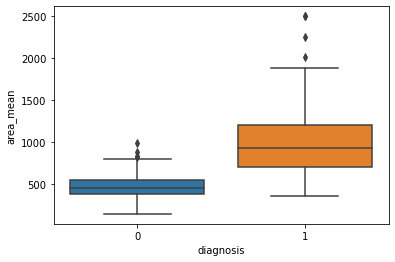

In [168]:
sns.boxplot(data=df, x="diagnosis", y="area_mean")

<AxesSubplot:xlabel='diagnosis', ylabel='concavity_mean'>

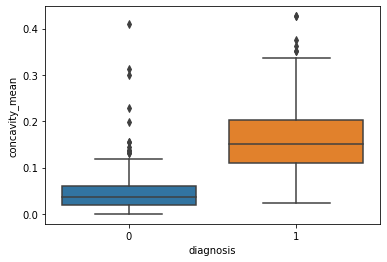

In [169]:
sns.boxplot(data=df, x="diagnosis", y="concavity_mean")

<AxesSubplot:xlabel='diagnosis', ylabel='concave points_mean'>

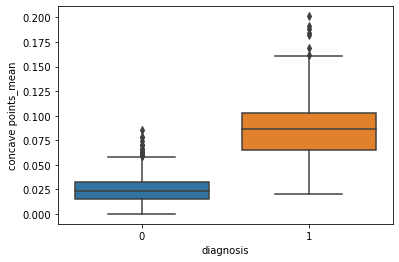

In [170]:
sns.boxplot(data=df, x="diagnosis", y="concave points_mean")

In [171]:
#Если смотреть на boxplot'ы, то среди размерных признаков можно выделить area_mean, так как в случае с доброкачественной 
# опухолью, значения между квартилями имеет более узкие границы, что означает, что с помощью данного параметра можно более
#точно определить доброкачественную опухоль.

#Если смотреть на boxplot'ы описательных признаков, то лучше использовать concave points_mean, т.к. границы квартилей 
#у доброкачественных опухолей также более узки, а также выбросов гораздо меньше, чем у concavity_mean.

Часть 2.

In [172]:
df_mean = df[['diagnosis', 'radius_mean','perimeter_mean','area_mean','concavity_mean', 'concave points_mean']]

In [173]:
# Приведем выбранные фичи к одному масштабу, с помощью StandardScaler для лучшей точности модели 
#(так как, например, среднее area_mean=654.889104, а concave points_mean=0.048919). Но следует сказать, если брать именно 
#эти фичи, данные можно не приводить к одному масштабу. Точность и так получается высокой.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_mean.drop('diagnosis', axis=1))
scaled_features = scaler.transform(df_mean.drop('diagnosis', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = df_mean.drop('diagnosis', axis=1).columns)
print(scaled_data)

     radius_mean  perimeter_mean  area_mean  concavity_mean  \
0       1.097064        1.269934   0.984375        2.652874   
1       1.829821        1.685955   1.908708       -0.023846   
2       1.579888        1.566503   1.558884        1.363478   
3      -0.768909       -0.592687  -0.764464        1.915897   
4       1.750297        1.776573   1.826229        1.371011   
..           ...             ...        ...             ...   
564     2.110995        2.060786   2.343856        1.947285   
565     1.704854        1.615931   1.723842        0.693043   
566     0.702284        0.672676   0.577953        0.046588   
567     1.838341        1.982524   1.735218        3.296944   
568    -1.808401       -1.814389  -1.347789       -1.114873   

     concave points_mean  
0               2.532475  
1               0.548144  
2               2.037231  
3               1.451707  
4               1.428493  
..                   ...  
564             2.320965  
565             1.263669  


In [174]:
# Выделим фичи и целевую переменную
x = scaled_data
y = df_mean['diagnosis']


In [175]:
from sklearn.model_selection import train_test_split
# Разделим данные на train и test (70/30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 398
Test cases: 171


In [176]:
# Обучение модели
from sklearn.neighbors import KNeighborsClassifier

# тренируем  модель логистической регрессии на тренировочном датасете
model = KNeighborsClassifier().fit(x_train, y_train)
print (model)

KNeighborsClassifier()


In [177]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
predictions = model.predict(x_test)
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))


Overall Accuracy: 0.9122807017543859
Overall Precision: 0.9094594594594595
Overall Recall: 0.9007936507936507
Overall f1_score: 0.9047778149014366


Average AUC: 0.9007936507936508


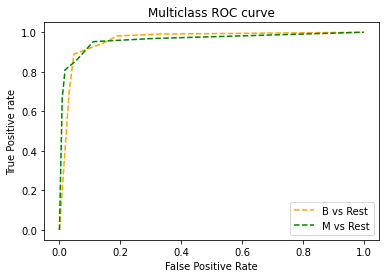

In [178]:
probabilities = model.predict_proba(x_test)
auc = roc_auc_score(y_test,predictions, multi_class='ovr')
print('Average AUC:', auc)
# Метрики ROC для каждого диагноза
diagnosis=['B','M']
fpr = {}
tpr = {}
thresh ={}
for i in range(len(diagnosis)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
# Построим ROC-кривую, площадь под ней и есть AUC. Чем выше показатель AUC, тем качественнее классификатор.
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=diagnosis[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=diagnosis[1] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [179]:
#В нашем случае даже с knn из коробки, получаем хорошую модель. 
#Далее проведем настройку параметра числа соседей на кросс-валидации

In [180]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, scoring='accuracy')
print(scores)
print('mean', scores.mean())
print('std', scores.std())

[0.85087719 0.9122807  0.93859649 0.93859649 0.94690265]
mean 0.9174507064120478
std 0.035271709165560994


In [181]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1, 2, 5, 10, 15, 20, 30, 40, 50, 75, 100]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring = 'accuracy')
clf.fit(x, y)
print('Best params: ', clf.best_params_)
print('Best accuracy: ', clf.best_score_)

Best params:  {'n_neighbors': 10}
Best accuracy:  0.9227138643067848


In [182]:
#По умолчанию n_neighbors в knn равно 5. Значение которое предсказала модель, на кросс-валидации 
#в одном из фолдов у нас есть (0.9122807).
#Лучшее значение accuracy при количестве соседей=10. Но я в ячейке выше видимо показывается самый первый фолд 
#поэтому и самое низкое значение.

Часть 3

In [183]:
df_lin = df[['diagnosis','radius_mean', 'perimeter_mean','area_mean','texture_mean','smoothness_mean','compactness_mean',
           'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
df_lin.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,122.80,1001.0,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,132.90,1326.0,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,130.00,1203.0,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,77.58,386.1,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,135.10,1297.0,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [184]:
df_lin.corr()

,diagnosis,radius_mean,perimeter_mean,area_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.742636,0.708984,0.415185,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.997855,0.987357,0.323782,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
perimeter_mean,0.742636,0.997855,1.000000,0.986507,0.329533,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.986507,1.000000,0.321086,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
texture_mean,0.415185,0.323782,0.329533,0.321086,1.000000,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
smoothness_mean,0.358560,0.170581,0.207278,0.177028,-0.023389,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.556936,0.498502,0.236702,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.716136,0.685983,0.302418,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.850977,0.823269,0.293464,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.183027,0.151293,0.071401,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


In [185]:
from scipy.stats.stats import pearsonr
pearsonr(df_lin['radius_mean'], df_lin['diagnosis'])

(0.7300285113754565, 8.465940572257788e-96)

In [186]:
#По таблице сходится, значит оно) Убираем фичи корреляция Пирсона между которыми превышает 0.85, согласно задания.
#Здесь по сути можно все оставлять, уберу только последнюю с отрицательной корреляцией.
#Если такую таблицу строить для всего датасета, кардинально ситуация не меняется.

In [203]:
df_lin = df_lin.drop(["fractal_dimension_mean"], axis = 1)
df_lin.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,1,17.99,122.80,1001.0,10.38,0.11840,0.27760,0.3001,0.14710,0.2419
1,1,20.57,132.90,1326.0,17.77,0.08474,0.07864,0.0869,0.07017,0.1812
2,1,19.69,130.00,1203.0,21.25,0.10960,0.15990,0.1974,0.12790,0.2069
3,1,11.42,77.58,386.1,20.38,0.14250,0.28390,0.2414,0.10520,0.2597
4,1,20.29,135.10,1297.0,14.34,0.10030,0.13280,0.1980,0.10430,0.1809


In [204]:
# Приведем выбранные фичи к одному масштабу, с помощью StandardScaler для лучшей точности модели 
scaler = StandardScaler()
scaler.fit(df_lin.drop('diagnosis', axis=1))
scaled_features_2 = scaler.transform(df_lin.drop('diagnosis', axis=1))
scaled_data_2 = pd.DataFrame(scaled_features_2, columns = df_lin.drop('diagnosis', axis=1).columns)
print(scaled_data_2)

     radius_mean  perimeter_mean  area_mean  texture_mean  smoothness_mean  \
0       1.097064        1.269934   0.984375     -2.073335         1.568466   
1       1.829821        1.685955   1.908708     -0.353632        -0.826962   
2       1.579888        1.566503   1.558884      0.456187         0.942210   
3      -0.768909       -0.592687  -0.764464      0.253732         3.283553   
4       1.750297        1.776573   1.826229     -1.151816         0.280372   
..           ...             ...        ...           ...              ...   
564     2.110995        2.060786   2.343856      0.721473         1.041842   
565     1.704854        1.615931   1.723842      2.085134         0.102458   
566     0.702284        0.672676   0.577953      2.045574        -0.840484   
567     1.838341        1.982524   1.735218      2.336457         1.525767   
568    -1.808401       -1.814389  -1.347789      1.221792        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  sym

In [205]:
# Выделим фичи и целевую переменную
x = scaled_data_2
y = df_lin['diagnosis']

In [206]:
# Разделим данные на train и test (70/30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 398
Test cases: 171


In [207]:
# Обучение модели
from sklearn.linear_model import LogisticRegressionCV
# тренируем  модель логистической регрессии 
model = LogisticRegressionCV().fit(x_train, y_train)
print (model)

LogisticRegressionCV()


In [208]:
predictions = model.predict(x_test)
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.9473684210526315
Overall Precision: 0.9479729729729729
Overall Recall: 0.9384920634920635
Overall f1_score: 0.942866688940862


Average AUC: 0.9384920634920634


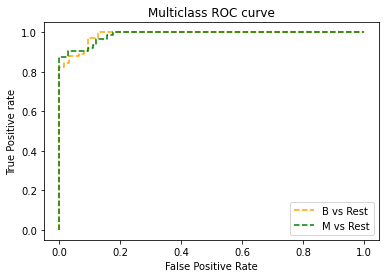

In [209]:
probabilities = model.predict_proba(x_test)
auc = roc_auc_score(y_test,predictions, multi_class='ovr')
print('Average AUC:', auc)
# Метрики ROC для каждого диагноза
diagnosis=['B','M']
fpr = {}
tpr = {}
thresh ={}
for i in range(len(diagnosis)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
# Построим ROC-кривую, площадь под ней и есть AUC. Чем выше показатель AUC, тем качественнее классификатор.
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=diagnosis[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=diagnosis[1] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [210]:
weight_data=sorted(list(zip(df_lin.columns, model.coef_)))
weight_data

[('diagnosis',
  array([-9.8227095 ,  5.59812558,  8.95280129,  1.60035014,  1.04935781,
         -0.57723302,  0.3804344 ,  2.5907241 ,  0.43040375]))]

In [211]:
parameters = {'Cs':[1,3,5,10,20,30,40,50]}
lr = LogisticRegressionCV()
clf = GridSearchCV(lr, parameters, scoring = 'accuracy')
clf.fit(x, y)
print('Best params: ', clf.best_params_)
print('Best accuracy: ', clf.best_score_)

Best params:  {'Cs': 40}
Best accuracy:  0.9332557056357708


In [214]:
# Установим скорость регуляризации согласно выполненной кросс-валидации
model_2= LogisticRegressionCV(Cs=40).fit(x_train, y_train)
print (model)

LogisticRegressionCV(Cs=40)


In [215]:
predictions_2 = model_2.predict(x_test)
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions_2))
print("Overall Precision:",precision_score(y_test, predictions_2, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions_2, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions_2, average='macro'))

Overall Accuracy: 0.9298245614035088
Overall Precision: 0.9303874092009685
Overall Recall: 0.9179894179894179
Overall f1_score: 0.9235469448584203


In [216]:
weight_data_2=sorted(list(zip(df_lin.columns, model_2.coef_)))
weight_data_2

[('diagnosis',
  array([0.75440045, 0.74275158, 0.71217733, 0.78446505, 0.46167093,
         0.24375059, 0.54167601, 0.85666906, 0.25633435]))]

In [ ]:
#Точность модели линейной регрессии из "коробки" так же на очень высоком уровне. 
#По умолчанию параметр обратной силу регуляризации равен 10. При помощи кросс-валидации оптимальное значение параметра 40.
#Точность модели при этом чуть ниже, но при этом коэффициенты регрессии имеют меньший разброс. 
#Если я все правильно понимаю, то это позволит модели более точно предсказывать целевой результат 
#при анализе большого количества новых данных. 

Выводы: использование логистической регресии по сравнению с knn показало более высокие результаты по всем показателям.